In [27]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [28]:
dataset = pd.read_csv('KNN_Dataset.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
len(dataset)

768

In [30]:
zero_not_accepted = ['Glucose','BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

In [31]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [32]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.23,random_state=0)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
print(X_train)

[[ 0.33976395 -1.48621324  0.77192132 ...  0.45461586 -0.93249133
   0.12442909]
 [ 0.04705186 -0.39109397  0.26736224 ... -0.60774962 -1.0454392
  -0.54561732]
 [-0.83108443 -1.02161719 -0.74175592 ... -0.4928993  -0.82548809
  -1.04815213]
 ...
 [ 0.04705186 -0.92206089 -0.65766274 ... -1.13893236 -0.95626983
  -1.04815213]
 [ 2.09603652 -1.22072978  0.09917588 ... -0.36369269 -0.50447835
   0.12442909]
 [ 0.33976395  0.47172727  0.77192132 ... -0.09092317  0.50610784
   2.97212635]]


In [73]:
classifier = KNeighborsClassifier(n_neighbors=13,p=2, metric='euclidean')

In [74]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [75]:
y_pred = classifier.predict(X_test)

In [76]:
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[106  16]
 [ 19  36]]


In [77]:
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.8022598870056498

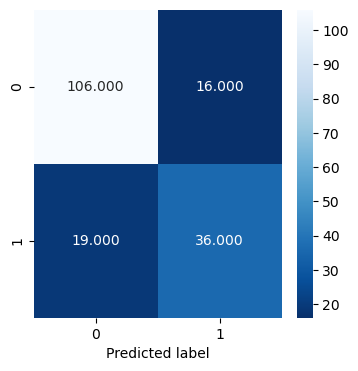

In [78]:
import matplotlib.pyplot as plt 
import seaborn as sns  

plt.figure(figsize=(4,4))
sns.heatmap(cm ,annot=True , fmt='.3f' , cmap='Blues_r')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(accuracy)
plt.show()

In [80]:
print(f1_score(y_test,y_pred))

0.6728971962616822
